# Εργαστηριακή Άσκηση 2. Μη επιβλεπόμενη μάθηση.
#### Ομάδα 56
#### Γεωργία Μανιφάβα
#### Δημήτρης Βάσιος
#### Ηλίας Ραγκούσης
## Σύστημα συστάσεων βασισμένο στο περιεχόμενο
## Σημασιολογική απεικόνιση δεδομένων με χρήση SOM 
Ημερομηνία εκφώνησης της άσκησης: 29 Νοεμβρίου 2022

**Θα βρείτε το παρόν σε μορφή jupyter notebook ως συνημμένο στο τέλος της εκφώνησης.**


In [1]:
!pip install --upgrade pip
!pip install h5py
!pip install typing-extensions
!pip install wheel
!pip install --upgrade numpy
!pip install --upgrade pandas
!pip install --upgrade nltk
!pip install --upgrade scikit-learn
!pip install --upgrade joblib
!pip install --upgrade contractions
!pip install unidecode

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 25.3 MB/s eta 0:00:0000:010:01
  Attempting uninstall: pip
    Found existing installation: pip 22.1.2
    Uninstalling pip-22.1.2:
      Successfully uninstalled pip-22.1.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 21.2 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: nltk
    Found existing installation: nltk 3.7
    Uninstalling nltk-3.7:
      Successfully uninstalled nltk-3.7
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
preprocessing 0.1.13 requires nltk==3.2.4, but you have nltk 3.8.1 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 6.1 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: joblib
    Found existing installation: joblib 1.0.1
    Uninstalling joblib-1.0.1:
      Successfully uninstalled joblib-1.0.1
ERROR: pip's dependency resolver do

In [ ]:
!ls -lh

## Εισαγωγή του Dataset

Το σύνολο δεδομένων με το οποίο θα δουλέψουμε είναι βασισμένο στο [Carnegie Mellon Movie Summary Corpus](http://www.cs.cmu.edu/~ark/personas/). Πρόκειται για ένα dataset με 22.301 περιγραφές ταινιών. Η περιγραφή κάθε ταινίας αποτελείται από τον τίτλο της, μια ή περισσότερες ετικέτες που χαρακτηρίζουν το είδος της ταινίας και τέλος τη σύνοψη της υπόθεσής της. Αρχικά εισάγουμε το dataset (χρησιμοποιήστε αυτούσιο τον κώδικα, δεν χρειάζεστε το αρχείο csv) στο dataframe `df_data_1`: 

In [2]:
import pandas as pd

dataset_url = "https://drive.google.com/uc?export=download&id=1zo13kUAf-MDMPZmBDxq1FxWtZY01lsxD"
df_data_1 = pd.read_csv(dataset_url, sep='\t',  header=None, quoting=3)

Κάθε ομάδα θα δουλέψει σε **ένα μοναδικό υποσύνολο 5.000 ταινιών** (διαφορετικό dataset για κάθε ομάδα) ως εξής:

1. Κάθε ομάδα του εργαστηρίου νευρωνικών έχει έναν αριθμό στο helios. Θα βάλετε τον αριθμό αυτό στη μεταβλητή team_seed_number στο επόμενο κελί κώδικα.

2. Το data frame `df_data_2` έχει γραμμές όσες και οι ομάδες και 5.000 στήλες. Σε κάθε ομάδα αντιστοιχεί η γραμμή του πίνακα με το `team_seed_number` της. Η γραμμή αυτή θα περιλαμβάνει 5.000 διαφορετικούς αριθμούς που αντιστοιχούν σε ταινίες του αρχικού dataset. 

3. Τρέξτε τον κώδικα. Θα προκύψουν τα μοναδικά για κάθε ομάδα  titles, categories, catbins, summaries και corpus με τα οποία θα δουλέψετε.

In [3]:
import numpy as np

# Στο επόμενη γραμή βάλτε τον αριθμό της ομάδας στο εργαστήριο των νευρωνικών
team_seed_number = 56

movie_seeds_url = "https://drive.google.com/uc?export=download&id=1g6F4TCHrs2wgtdOk7D3gtONaeirNt_Vo"
df_data_2 = pd.read_csv(movie_seeds_url, header=None)

# επιλέγεται 
my_index = df_data_2.iloc[team_seed_number,:].values

titles = df_data_1.iloc[:, [2]].values[my_index] # movie titles (string)
categories = df_data_1.iloc[:, [3]].values[my_index] # movie categories (string)
bins = df_data_1.iloc[:, [4]]
catbins = bins[4].str.split(',', expand=True).values.astype(float)[my_index] # movie categories in binary form (1 feature per category)
summaries =  df_data_1.iloc[:, [5]].values[my_index] # movie summaries (string)
corpus = summaries[:,0].tolist() # list form of summaries
corpus_df = pd.DataFrame(corpus) # dataframe version of corpus

- Ο πίνακας **titles** περιέχει τους τίτλους των ταινιών. Παράδειγμα: 'Sid and Nancy'.
- O πίνακας **categories** περιέχει τις κατηγορίες (είδη) της ταινίας υπό τη μορφή string. Παράδειγμα: '"Tragedy",  "Indie",  "Punk rock",  "Addiction Drama",  "Cult",  "Musical",  "Drama",  "Biopic \[feature\]",  "Romantic drama",  "Romance Film",  "Biographical film"'. Παρατηρούμε ότι είναι μια comma separated λίστα strings, με κάθε string να είναι μια κατηγορία.
- Ο πίνακας **catbins** περιλαμβάνει πάλι τις κατηγορίες των ταινιών αλλά σε δυαδική μορφή ([one hot encoding](https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f)). Έχει διαστάσεις 5.000 x 322 (όσες οι διαφορετικές κατηγορίες). Αν η ταινία ανήκει στο συγκεκριμένο είδος η αντίστοιχη στήλη παίρνει την τιμή 1, αλλιώς παίρνει την τιμή 0.
- Ο πίνακας **summaries** και η λίστα **corpus** περιλαμβάνουν τις συνόψεις των ταινιών (η corpus είναι απλά ο summaries σε μορφή λίστας). Κάθε σύνοψη είναι ένα (συνήθως μεγάλο) string. Παράδειγμα: *'The film is based on the real story of a Soviet Internal Troops soldier who killed his entire unit  as a result of Dedovschina. The plot unfolds mostly on board of the prisoner transport rail car guarded by a unit of paramilitary conscripts.'*
- το dataframe **corpus_df** που είναι απλά το corpus σε μορφή dataframe. Τα summaries βρίσκονται στην κολόνα 0. Πιθανώς να σας βολεύει να κάνετε κάποιες προεπεξεργασίες με dataframes.


Θεωρούμε ως **ID** της κάθε ταινίας τον αριθμό γραμμής της ή το αντίστοιχο στοιχείο της λίστας. Παράδειγμα: για να τυπώσουμε τη σύνοψη της ταινίας με `ID=999` (την χιλιοστή) θα γράψουμε `print(corpus[999])`.

In [4]:
ID = 999
print(titles[ID])
print(categories[ID])
print(catbins[ID])
print(corpus[ID])
print(corpus_df.loc[ID,:])


['Aina']
['"Musical",  "Drama",  "Romance Film"']
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 

# Εφαρμογή 1. Υλοποίηση συστήματος συστάσεων ταινιών βασισμένο στο περιεχόμενο
<img src="http://clture.org/wp-content/uploads/2015/12/Netflix-Streaming-End-of-Year-Posts.jpg" width="70%">

Η πρώτη εφαρμογή που θα αναπτύξετε θα είναι ένα [σύστημα συστάσεων](https://en.wikipedia.org/wiki/Recommender_system) ταινιών βασισμένο στο περιεχόμενο (content based recommender system). Τα συστήματα συστάσεων στοχεύουν στο να προτείνουν αυτόματα στο χρήστη αντικείμενα από μια συλλογή τα οποία ιδανικά θέλουμε να βρει ενδιαφέροντα ο χρήστης. Η κατηγοριοποίηση των συστημάτων συστάσεων βασίζεται στο πώς γίνεται η επιλογή (filtering) των συστηνόμενων αντικειμένων. Οι δύο κύριες κατηγορίες είναι η συνεργατική διήθηση (collaborative filtering) όπου το σύστημα προτείνει στο χρήστη αντικείμενα που έχουν αξιολογηθεί θετικά από χρήστες που έχουν παρόμοιο με αυτόν ιστορικό αξιολογήσεων και η διήθηση με βάση το περιεχόμενο (content based filtering), όπου προτείνονται στο χρήστη αντικείμενα με παρόμοιο περιεχόμενο (με βάση κάποια χαρακτηριστικά) με αυτά που έχει προηγουμένως αξιολογήσει θετικά.

Το σύστημα συστάσεων που θα αναπτύξετε θα βασίζεται στο **περιεχόμενο** και συγκεκριμένα στις συνόψεις των ταινιών (corpus). 


## Προεπεξεργασία

Το πρώτο βήμα στην επεξεργασία μας είναι ο καθαρισμός των περιγραφών των ταινιών. 

Εκτυπώστε (αρκετές) διαφορετικές περιγραφές ταινιών για να δείτε πιθανά προβλήματα που θα πρέπει να αντιμετωπιστούν.

Τα (ελάχιστα) βήματα καθαρισμού που προτείνουμε είναι:
- μετατροπή όλων των χαρακτήρων σε πεζά,
- αφαίρεση των stopwords. Εδώ σημειώστε ότι για το δεδομένο task του συστήματος συστάσεων που είναι η πρόταση ταινιών ίσως θα είχαν ενδιαφέρον και λίστες stopwords πέραν αυτών της κοινής γλώσσας.
- αφαίρεση σημείων στίξης και ειδικών χαρακτρήρων (special characters). Αυτό δεν γίνεται μόνο με την punkt του NLTK. Θα μπορούσατε να βασιστείτε σε κανονικές εκφράσεις (regular expressions), και
- αφαίρεση πολυ σύντομων συμβολοσειρών.

Προσοχή: το corpus και τα τελικά tokens που θα το αποτελούν θα χρησιμοποιηθούν στη συνέχεια ως κλειδιά για να βρούμε εμφυτεύματα. Για το λόγο αυτό, πρέπει να είστε προσεκτικοί ως προς την εφαρμογή μεθόδων κανονικοποίησης (text normalization) όπως το stemming και το lemmatization.

In [5]:
#necessary imports and downloads
import numpy as np
import string
import nltk
import scipy
import joblib
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from unidecode import unidecode
import collections
import contractions
import re

nltk.download('punkt')
nltk.download('stopwords') 
nltk.download('wordnet') 
nltk.download('rslp')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package rslp to /usr/share/nltk_data...
[nltk_data]   Package rslp is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...


True

*Oρισμός της thorough_filter με όρισμα τις λέξεις ενός corpus. Την χρησιμοποιούμε παρακάτω στην preprocessing για να αφαιρέσουμε τα tokens που περιέχουν περισσότερα από ένα σημεία στίξης.*

In [6]:
def thorough_filter(words):
    filtered_words = []
    for word in words:
        pun = []
        for letter in word:
            pun.append(letter in string.punctuation)
        if not all(pun):
            filtered_words.append(word)
    return filtered_words

print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


#### Erase names
*Θα θεωρήσουμε ως επιπλέον stopwords, τα συνηθισμένα αγγλικά αντρικά και γυναικεία ονόματα. Οι ταινίες συνήθως περιέχουν τα ονόματα πρωταγωνιστών. Κάνουμε αυτή την επιλογή ώστε το σύστημα συστάσεων να μην προτείνει ταινίες με άσχετο περιεχόμενο επειδή απλά τυγχάνει οι πρωταγωνιστές να έχουν το ίδιο όνομα σε δύο διαφορετικές ταινίες. Χρησιμοποιούμε το αρχείο names.txt που έχει αντληθεί από το United States Naval Academy και περιέχει αγγλικά ονόματα. Πριν το χρησιμοποιήσουμε για την προεπεξεργασία, μετατρέπουμε το πρώτο γράμμα των ονομάτων σε πεζό. Η διαδικασία φαίνεται στο παρακάτω κελί.*

In [7]:
f = open("/kaggle/input/namestxt/names.txt", "r")
names = list(f.read().splitlines())

for i in range (len(names)):
    names[i] = names[i].lower()   

*Παρακάτω ορίζουμε την συνάρτηση προεπεξεργασίας που διατρέχει ολόκληρο το dataset, για να εκτελεστούν παντού τα βήματα καθαρισμού. Παρακάτω παραθέτουμε με σειρά εκτέλεσης τα βήματα προεπεξεργασίας:*
* Πριν εξάγουμε τα tokens, κάνουμε μια ελάχιστη προεπεξεργασία, αφαιρώντας τα πιθανά κενά στην αρχή και στο τέλος των λέξεων, μετατρέπουμε όλες τις λέξεις σε πεζά και διορθώνουμε τις συντομεύσεις φράσεων(don't-->do not)
* Eξάγουμε τα tokens
* Επίσης, αφαιρούμε τα stopwords που δεν προσφέρουν χρήσιμη πληροφορία για τη διάκριση περιεχομένου. Κρίναμε σημαντική και την αφαίρεση ειδικών stopwords που χρησιμοποιούνται αρκετά συχνά στο συγκεκριμένο dataset αλλά και γενικά στις περιγραφές ταινιών και έτσι ορίσαμε την λίστα special_stopwords. Eνοποιούμε τις λίστες common_stopwords και special_stopwords και γεμίζουμε την filtered_words με τις λέξεις που δεν είναι ούτε stopwords, oύτε αγγλικά ονόματα αλλά ούτε και σημεία στίξης.
* Χρησιμοποιούμε τη thorough_filter για περεταίρω φιλτράρισμα στα σημεία στίξης. Αντικαθιστούμε τους special non-ascii characters, που συνήθως είναι τονισμοί ξένων γλωσσών (unidecode). Ακόμα, αντιμετωπίζουμε οποιονδήποτε άλλον ειδικό χαρακτήρα με regular expression(πχ \n - Newline και \t- Horizontal tab)
* Αφαιρούμε τις πολύ σύντομες λέξεις(μήκους μικρότερου του 3)
* Eφαρμόζουμε τον γλωσσικό μεταχηματισμό του Lemmatization, ο οποίος αν και πιο αργός από το stemming, προσφέρει πιο ακριβή αποτελέσματα.


In [8]:
corpus_new=[d for d in corpus]
def preprocessing(corpus_new):
    #strip spaces, convert letters to lower, fix contractions:you're-->you are
    for i in range (len(corpus_new)):
        corpus_new[i] = corpus_new[i].strip()  # strip leading / trailing spaces
        corpus_new[i] = corpus_new[i].lower()
        corpus_new[i] = contractions.fix(corpus_new[i])
    
    #tokenization, To tokens[i] είναι τα tokens του corpus[i]
    tokens = []
    for i in range (len(corpus_new)):
        words = nltk.word_tokenize(corpus_new[i])
        tokens.append(words)
    
    #Remove stopwords(general english ones and some special ones), the punctuation symbols and the names 
    common_stopwords = set(stopwords.words('english'))
    special_stopwords=["film","movie","plot","performance","episode","story","scene","actor","summary","hero","protagonist","finale","prologue", "director","character","cinema",
                      "one","two","love","man","father","new","young","life","time","family","first","police","home","mother","house","wife","three","money","car",
                      "son","friend","man","woman","girl","friend","death","Dr.","Mr.","Mrs","people","town","fight","brother","place","parents", "thing", "something","kill","killed"]      
    
    StopWords=set.union(common_stopwords, special_stopwords)
    #print(StopWords)
    
    #Στο filtered_words[i] γίνονται append οι λέξεις του corpus[i] που έχουν περάσει το filtering, που άρα δεν είναι σημεία στίξης
    #και δεν ανήκουν ούτε στα stopwords ούτε στα αγγλικά ονόματα.
    filtered_words=[]
    for i in range (len(corpus_new)): 
        word=[w for w in tokens[i] if (w not in StopWords and w not in list(string.punctuation) and w not in names)]
        filtered_words.append(word)
    
    #Extra handling of punctuation with thorough_filter, remove non ascii characters and special characters with regular expression
    for i in range (len(corpus_new)):
        filtered_words[i] = thorough_filter(filtered_words[i])
        filtered_words[i] = [unidecode(w) for w in filtered_words[i]]
        filtered_words[i] = [re.sub('[^a-zA-Z0-9-_]', '', w) for w in filtered_words[i]] # keep only lowercase letters,numbers and underscores
    
    #Remove short words
    filtered_words_new = []
    for i in range (len(corpus_new)):
        word=[w for w in filtered_words[i] if (len(w)>=3)]
        filtered_words_new.append(word)
        
    #lemmatization
    lem_words=[]
    for i in range(len(corpus_new)):
        lem_words.append([WordNetLemmatizer().lemmatize(w) for w in filtered_words_new[i]])
        
    # concatenate tokens back to a sentence
    pr_corpus = []
    for i in range (len(corpus_new)):
        pr_corpus.append(" ".join(lem_words[i]))

    
    return corpus,tokens,lem_words,pr_corpus

*Eφαρμόζουμε τη συνάρτηση προεπεξεργασίας στο corpus, που είναι η λίστα με όλες τις περιγραφές των ταινιών του dataset σε μορφή λίστας που περιέχει strings. Τυπώνουμε για έλεγχο ένα παράδειγμα με τα tokens στην αρχή της προεπεξεργασίας, τα tokens στο τέλος της προεπεξεργασίας και το προεπεξεργασμένο corpus με συνένωση των tokens.*

In [12]:
pr_corpus=preprocessing(corpus_new)

print(pr_corpus[1][ID])
print(pr_corpus[2][ID])
print(pr_corpus[3][ID])

['aina', 'is', 'a', 'love', 'story', 'of', 'two', 'hearts', 'and', 'two', 'souls', 'but', 'from', 'two', 'different', 'social', 'classes', ',', 'one', 'being', 'a', 'daughter', 'of', 'a', 'business', 'tycoon', 'i.e', '.', 'rita', 'and', 'one', 'being', 'a', 'realistic', ',', 'self-confident', 'and', 'a', 'little', 'bit', 'arrogant', 'poor', 'young', 'man', '.', 'rita', 'is', 'a', 'leisure', 'girl', 'whereas', 'nadeem', 'works', 'as', 'a', 'hotel', 'receptionist', 'and', 'they', 'both', 'fall', 'in', 'love', '.', 'the', 'differences', 'between', 'nadeem', 'and', 'rita', "'s", 'father', 'seth', 'arises', 'right', 'from', 'the', 'beginning', ',', 'esp', '.', 'when', 'he', 'criticised', 'nadeem', 'for', 'his', 'social', 'status', 'and', 'earning', 'capacity', ',', 'saying', 'his', 'daughter', "'s", 'sari', 'costs', '7,500', 'rupees', 'as', 'compare', 'to', 'his', 'monthly', 'salary', 'of', '750', 'rupees', '.', 'but', 'after', 'a', 'struggle', 'by', 'rita', 'and', 'a', 'threat', 'to', 'her

In [13]:
joblib.dump(corpus, 'corpus.pkl')
joblib.dump(pr_corpus, 'pr_corpus.pkl')

['pr_corpus.pkl']

In [14]:
corpus = joblib.load('corpus.pkl')
pr_corpus = joblib.load('pr_corpus.pkl')

## Μετατροπή σε TFIDF

Το πρώτο βήμα θα είναι λοιπόν να μετατρέψετε το corpus σε αναπαράσταση tf-idf:

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
# create sparse tf_idf representation
vectorizer = TfidfVectorizer()
vectorizer.fit(pr_corpus[3])
#transform sparse matrix to numpy array
corpus_tf_idf_plain = vectorizer.transform(pr_corpus[3]).toarray()

Η συνάρτηση [TfidfVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) όπως καλείται εδώ **δεν είναι βελτιστοποιημένη**. Οι επιλογές των μεθόδων και παραμέτρων της μπορεί να έχουν **δραματική επίδραση στην ποιότητα των συστάσεων** και είναι διαφορετικές για κάθε dataset. Επίσης, οι επιλογές αυτές έχουν πολύ μεγάλη επίδραση και στη **διαστατικότητα και όγκο των δεδομένων**. Η διαστατικότητα των δεδομένων με τη σειρά της θα έχει πολύ μεγάλη επίδραση στους **χρόνους εκπαίδευσης**, ιδιαίτερα στη δεύτερη εφαρμογή της άσκησης.

Προσοχή: ο TfidfVectorizer έχει κάποιες δυνατότητες προεπεξεργασίας παρόποιες με αυτές που αναφέραμε στην προηγούμενη ενότητα. Ό,τι προεπεξεργασία μπορείτε να κάνετε που χρειάζεται ως είσοδο μόνο το κάθε document ξεχωριστά, κάντε την στο πρώτο βήμα της προεπεξεργασίας. Αν χρειάζεται γνώση των συνολικών στατιστικών της συλλογής, κάντε την με τον TfidfVectorizer.

In [16]:
print(corpus_tf_idf_plain.shape)

(5000, 40527)


In [17]:
print(corpus_tf_idf_plain)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [18]:
joblib.dump(corpus_tf_idf_plain, 'corpus_tf_idf_plain.pkl') 

['corpus_tf_idf_plain.pkl']

In [19]:
corpus_tf_idf_plain = joblib.load('corpus_tf_idf_plain.pkl')

## Υλοποίηση του συστήματος συστάσεων

Το σύστημα συστάσεων που θα υλοποιήσετε θα είναι μια συνάρτηση `content_recommender` με τρία ορίσματα: `target_movie`, `max_recommendations` και `corpus_type`. Στην `target_movie` περνάμε το ID μιας ταινίας-στόχου για την οποία μας ενδιαφέρει να βρούμε παρόμοιες ως προς το περιεχόμενο (τη σύνοψη) ταινίες, `max_recommendations` στο πλήθος.
Υλοποιήστε τη συνάρτηση ως εξής: 
- για την ταινία-στόχο, θα υπολογίζετε την [ομοιότητα συνημιτόνου](https://en.wikipedia.org/wiki/Cosine_similarity) της με όλες τις ταινίες της συλλογής σας όπως αυτές αναπαριστώνται στο `corpus_type`.
- με βάση την ομοιότητα συνημιτόνου που υπολογίσατε, δημιουργήστε ταξινομημένο πίνακα από το μεγαλύτερο στο μικρότερο, με τα indices (`ID`) των ταινιών. Παράδειγμα: αν η ταινία με index 1 έχει ομοιότητα συνημιτόνου με 3 ταινίες \[0.2 1 0.6\] (έχει ομοιότητα 1 με τον εαύτό της) ο ταξινομημένος αυτός πίνακας indices θα είναι \[1 2 0\].
- Για την ταινία-στόχο εκτυπώστε: id, τίτλο, σύνοψη, κατηγορίες (categories)
- Για τις `max_recommendations` ταινίες (πλην της ίδιας της ταινίας-στόχου που έχει cosine similarity 1 με τον εαυτό της) με τη μεγαλύτερη ομοιότητα συνημιτόνου (σε φθίνουσα σειρά), τυπώστε σειρά σύστασης (1 πιο κοντινή, 2 η δεύτερη πιο κοντινή κλπ), ομοιότητα συνημιτόνου, id, τίτλο, σύνοψη, και κατηγορίες (categories)


*Yπολογίσαμε την ομοιότητα συνημιτόνου κάθε ταινίας με τις υπόλοιπες σύμφωνα με τη σχέση:
`ομοιότητα συνημιτόνου = 1 - απόσταση συνημιτόνου`* <br/>
*Παρακάτω φαίνεται η υλοποίηση της συνάρτησης.*

In [20]:
def content_recommender(target_movie, max_recommendations, corpus_type):
    cos_sim = np.zeros((corpus_type.shape[0]))
    
    #compute cosine similarity
    for i in range(corpus_type.shape[0]):
        cos_sim[i] = 1 - scipy.spatial.distance.cosine(corpus_type[target_movie], corpus_type[i])
        
    #sort the similarities 
    indices = np.argsort(cos_sim)[::1] #sort the similarities in  descending order and return the indices
    sorted_cos = sorted(cos_sim, reverse=True) #sort the similarities in descending order 
    
    #Target movie printing
    print("Target movie:",target_movie)
    print("ID:", target_movie)
    print("Title:", titles[target_movie])
    print("Summary:",corpus[target_movie])
    print("Categories:",categories[target_movie])
    print("_________________________________________________________________________\n")
    print("Max recommendations:",max_recommendations)
    print("_________________________________________________________________________\n")
    #Max recommended movies printing
    for i in range(max_recommendations):
        movie = indices[i+1]
        
        print("Recommendation order:",i+1)
        print("Cosine similarity:", sorted_cos[i+1])
        print("ID:", movie)
        print("Title:", titles[movie])
        print("Summary:", corpus[movie])
        print("Categories:", categories[movie])
        print("____________________________________________________________________\n")

In [21]:
content_recommender(999,3,corpus_tf_idf_plain)

Target movie: 999
ID: 999
Title: ['Aina']
Summary: Aina is a love story of two hearts and two souls but from two different social classes, one being a daughter of a business tycoon i.e. Rita  and one being a realistic, self-confident and a little bit arrogant poor young man . Rita is a leisure girl whereas Nadeem works as a hotel receptionist and they both fall in love. The differences between Nadeem and Rita's father Seth  arises right from the beginning, esp. when he  criticised Nadeem for his social status and earning capacity, saying his daughter's sari costs 7,500 rupees as compare to his  monthly salary of 750 rupees. But after a struggle by Rita and a threat to her parents that she would suicide if she would not be allowed to marry Nadeem, her father agreed. So both married but Nadeem knew that Seth was not really happy with this marriage. One day Rita's mother  came to her daughter's house, located in a middle class, and offered Nadeem a job in Seth's friend's business firm, wh

## Βελτιστοποίηση του TfidfVectorizer

Αφού υλοποιήσετε τη συνάρτηση `content_recommender` χρησιμοποιήστε την για να βελτιστοποιήσετε την `TfidfVectorizer`. Συγκεκριμένα, αρχικά μπορείτε να δείτε τι επιστρέφει το σύστημα για τυχαίες ταινίες-στόχους και για ένα μικρό `max_recommendations` (2 ή 3). Αν σε κάποιες ταινίες το σύστημα μοιάζει να επιστρέφει σημασιολογικά κοντινές ταινίες σημειώστε το `ID` τους. Δοκιμάστε στη συνέχεια να βελτιστοποιήσετε την `TfidfVectorizer` για τα συγκεκριμένα `ID` ώστε να επιστρέφονται σημασιολογικά κοντινές ταινίες για μεγαλύτερο αριθμό `max_recommendations`. Παράλληλα, όσο βελτιστοποιείτε την `TfidfVectorizer`, θα πρέπει να λαμβάνετε καλές συστάσεις για μεγαλύτερο αριθμό τυχαίων ταινιών. 

Ταυτόχρονα, μια αντίρροπη κατά κάποιο τρόπο κατεύθυνση της βελτιστοποίησης είναι να χρησιμοποιείτε τις παραμέτρους του `TfidfVectorizer` έτσι ώστε να μειώνονται οι διαστάσεις του Vector Space Model μέχρι το σημείο που θα αρχίσει να εμφανίζονται επιπτώσεις στην ποιότητα των συστάσεων. 




Παραπάνω κάναμε fit την TfidfVectorizer στo corpus, **με όλη την  προεπεξεργασία που έχει προηγηθεί** στο dataset. Στη βελτιστοποίηση της συνάρτησης θα προσαρμόσουμε τις παραμέτρους της που αφορούν την προεπεξεργασία των δεδομένων. Συνεπώς, θα δούμε αλλαγές στη διαστατικότητα(με τις default παραμέτρους, η διαστατικότητα είναι 40527), που θα διευκολύνουν την επεξεργασία για την εξαγωγή συστάσεων. Δοκιμάζοντας αρκετές τιμές και παρατηρώντας τα αποτελέσματα της content_recommender για διαφορετικές ταινίες και διαφορετικά max_recommendations, σκοπεύουμε να εντοπίσουμε ένα σύνολο παραμέτρων που επιστρέφουν ι σημασιολογικά παρόμοιες ταινίες. Ως κριτήριο για το αν η content_recommender επιστρέφει ικανοποιητικά αποτελέσματα, διαβάζουμε και συγκρίνουμε τις περιγραφές και τις κατηγορίες των ταινιών που προτείνει. Παρκάτω θα τροποποίησουμε  τις παραμέτρους max_df και min_df. Η max_df αγνοεί τους όρους που εμφανίζονται από ένα ποσοστό και πάνω σε όλα τα κείμενα συνολικά, ενώ η min_df αγνοεί τους πολύ σπάνιους όρους. Δεδομένου ότι έχει προηγηθεί επεξεργασία στα corpus, δε θα αφαιρέσουμε άλλες λέξεις.\
Αρχικά, ας εφαρμόσουμε μερικές φορές ακόμα τo μη βελτιστοποιημένο σύστημα συστάσεων:

In [ ]:
content_recommender(2000,3,corpus_tf_idf_plain)

In [ ]:
content_recommender(2600,2,corpus_tf_idf_plain)

In [ ]:
content_recommender(4700,2,corpus_tf_idf_plain)

Παραπάνω, παρατίθενται οι συστάσεις για 4 τυχαίες με διαφορετικές ταινίες-στόχους, με IDs=999,2000,2600 και 4700 και max_recommendations=2 ή 3. Παρατηρούμε ότι οι μεγαλύτερες τιμές στις ομοιότητες συνημιτόνου προκύπτουν στην τρίτη και ταινία, που κυμαίνονται μεταξύ 0.32 και 0.45. Στις άλλες 2 συστάσεις, οι ομοιότητες συνημιτόνου είναι περίπου 0.15 ή λιγότερο και όσον αφορά το περιεχόμενο δεν είναι αρκετά νοηματικά κοντινές οι συστάσεις με την ταινία στόχο. \
Aρχικά, τροποποιούμε τις παραμέτρους maxdf και mindf, για να μειώσουμε τη διαστατικότητα και πάρουμε καλύτερες συστάσεις.

In [22]:
opt_vectorizer = TfidfVectorizer(min_df=0.0008)
opt_vectorizer.fit(pr_corpus[3])
corpus_tf_idf_optimal = opt_vectorizer.transform(pr_corpus[3]).toarray()
print(corpus_tf_idf_optimal.shape)


(5000, 12222)


In [23]:
content_recommender(999,3,corpus_tf_idf_optimal)

Target movie: 999
ID: 999
Title: ['Aina']
Summary: Aina is a love story of two hearts and two souls but from two different social classes, one being a daughter of a business tycoon i.e. Rita  and one being a realistic, self-confident and a little bit arrogant poor young man . Rita is a leisure girl whereas Nadeem works as a hotel receptionist and they both fall in love. The differences between Nadeem and Rita's father Seth  arises right from the beginning, esp. when he  criticised Nadeem for his social status and earning capacity, saying his daughter's sari costs 7,500 rupees as compare to his  monthly salary of 750 rupees. But after a struggle by Rita and a threat to her parents that she would suicide if she would not be allowed to marry Nadeem, her father agreed. So both married but Nadeem knew that Seth was not really happy with this marriage. One day Rita's mother  came to her daughter's house, located in a middle class, and offered Nadeem a job in Seth's friend's business firm, wh

In [ ]:
content_recommender(2000,3,corpus_tf_idf_optimal)

In [ ]:
content_recommender(2600,3,corpus_tf_idf_optimal)

In [ ]:
content_recommender(4700,3,corpus_tf_idf_optimal)

In [ ]:
content_recommender(1000,3,corpus_tf_idf_optimal)

## Βαθιά μάθηση: δημιουργία corpora με χρήση word emmbeddings

Η προσέγγιση της κατασκευής μόνο μέσω tfidf του συστήματος συστάσεων έχει διάφορα μειονεκτήματα. Θα μας ενδιέφερε λοιπόν να δούμε αν μπορούμε να χρησιμοποιήσουμε για τις λέξεις **εμφυτεύματα (embeddings)**, δηλαδή τις πυκνές διανυσματικές αναπαραστάσεις για τις λέξεις που μας δίνει το μοντέλο **Word2Vec**

Ωστόσο, το dataset της κάθε ομάδας είναι πολύ μικρό για να εξάγουμε τα δικά μας word embeddings (και να είναι καλά). Για το λόγο αυτό θα χρησιμοποιήσουμε τη μεθοδολογία της Βαθιάς Μάθησης που είναι η **Μεταφορά Μάθησης (Transfer Learning).**.

Στη μεταφορά μάθησης ουσιαστικά μεταφέρουμε τη γνώση που έχει αποκτήσει ένα ήδη εκπαιδευμένο (και κατά κανόνα πολύ μεγάλο) σύστημα. Η μεταφορά γίνεται διαμέσου των τιμών των βαρών που έχει προσδιορίσει μετά το πέρας της εκπαίδευσης.

Στην περίπτωσή μας, δεν μας ενδιαφέρουν τόσο τα ίδια τα βάρη των μοντέλων από τα οποία θα κάνουμε μεταφορά μάθησης. Κάτι τέτοιο θα μας ενδιέφερε αν π.χ. θέλαμε να συνεχίσουμε την εκπαίδευση στα δικά μας κείμενα. Μας ενδιαφέρουν όμως τα ίδια τα εμφυτεύματα, δηλαδή τα embeddings (διανύσματα διαστάσεων $m$) που έχει μάθει το νευρωνικό για το λεξιλόγιο του (vocabulary). To vocabulary σε τέτοια μεγάλα νευρωνικά θα είναι πιθανότατα υπερσύνολο του δικού μας.

### Μεταφορά μάθησης εμφυτευμάτων



#### Εμφυτεύματα του Gensim-data
Το Gensim περιλαμβάνει αρκετά προεκπαιδευμένα μοντέλα εμφυτευμάτων Word2Vec. Με το επόμενο κελί παίρνουμε τη λίστα τους.

In [24]:
!pip install -U gensim
import gensim.downloader
print(list(gensim.downloader.info()['models'].keys()))

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.1/24.1 MB 47.3 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: gensim
    Found existing installation: gensim 4.0.1
    Uninstalling gensim-4.0.1:
      Successfully uninstalled gensim-4.0.1
['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


Τα μοντέλα αυτά βρίσκονται στο [αποθετήριο Gensim-data](https://github.com/RaRe-Technologies/gensim-data) όπου μπορείτε να βρείτε και την τεκμηρίωσή τους. Η φόρτωση των μοντέλων αυτών γίνεται με τη συνάρτηση `gensim.downloader.load`.

In [25]:
from gensim.models.word2vec import Word2Vec
import gensim.downloader as api

In [ ]:
corpus1 = api.load('fasttext-wiki-news-subwords-300')
#corpus2 = api.load('glove-twitter-200')
#corpus3 = api.load('glove-wiki-gigaword-300')

[===========================================-------] 87.6% 839.4/958.4MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[===============================================---] 95.8% 918.1/958.4MB downloaded

In [30]:
#συντελεστές ομοιότητας για μία λέξη για κάθε ένα απότα τρία μοντέλα του gensim
print(corpus1.most_similar('flower'))
#print(corpus2.most_similar('flower'))
#print(corpus3.most_similar('flower'))

[('flowers', 0.8167291879653931), ('flower-', 0.7359845638275146), ('flowering', 0.7335359454154968), ('flower-pot', 0.731009304523468), ('cut-flower', 0.7299766540527344), ('blossoms', 0.7290408611297607), ('flowerhead', 0.7245753407478333), ('carnation', 0.7160440683364868), ('flower-bearing', 0.705016016960144), ('bloom', 0.7047209739685059)]


In [31]:
print(corpus1['flower'].shape)
#print(corpus2['flower'].shape)
#print(corpus3['flower'].shape)

(300,)


In [33]:
joblib.dump(corpus1, 'corpus1.pkl') 

['corpus1.pkl']

In [34]:
corpus1=joblib.load('corpus1.pkl')

#### Άλλα εμφυτεύματα
Μπορείτε να βρείτε προεκπαιδευμένα εμφυτεύματα και από πηγές εκτός του Gensim. Για παράδειγμα:

- [Google News dataset](https://code.google.com/archive/p/word2vec/). Πρόκειται για προ-εκπαιδευμένα διανύσματα που έχουν εκπαιδευτεί σε μέρος του συνόλου δεδομένων Google News (περίπου 100 δισεκατομμύρια λέξεις). Το μοντέλο περιέχει διανύσματα 300 διαστάσεων για 3 εκατομμύρια λέξεις και φράσεις.
- [Amazon BlazingText](https://docs.aws.amazon.com/sagemaker/latest/dg/blazingtext.html). Το BlazingText δεν είναι μόνο προεκπαιδευμένα εμφυτεύματα αλλα και βελτιστοποιημένες υλοποιήσεις των αλγορίθμων Word2vec για την επεξεργασία κειμένου. Προυπόθεση είναι να δουλέψει κανείς στο SageMaker.

Οι διαδικασίες φόρτωσης embeddings από εξωτερικά δεδομένα μπορεί να είναι ελαφρά διαφορετικές από αυτή του Gensim.



#### Παρατηρήσεις

*   Επαναλαμβάνουμε ότι στην εργασία αυτή δεν μας ενδιαφέρουν τα ίδια τα μοντέλα αλλά το να μπορούμε για μία λέξη του λεξιλογίου μας να μπορούμε να βρούμε το embedding (διάνυσμα) που της αντιστοιχεί στο εκάστοτε προεκπαιδευμένο μοντέλο. 

*   Επίσης, δεν θα χρησιμοποιήσουμε την `Phrases` για να βρούμε bigrams στο dataset μας όπως θα ήταν το ορθότερο, καθώς αυτό θα απαιτούσε την συνέχιση της εκπαίδευσης του μοντέλου σε νέο λεξιλόγιο με πολύ λίγα νέα δεδομένα.


 ### Δημιουργία corpora βασισμένων στα εμφυτεύματα

Για να μπορέσουμε να ενσωματώσουμε τη γνώση που υπάρχει στα προεκπαιδευμένα εμφυτεύματα στο δικό μας corpus θα προχωρήσουμε όπως περιγράφεται ακολούθως.

Για κάθε περιγραφή ταινίας $d$, η οποία αποτελείται από τις $N_d$ λέξεις $w_i$, το  $tfidf$ της κάθε λέξης $w_i$ δίνεται από τη σχέση:

$$ tfidf(w_i) = tf(w_i,d) \cdot idf(w_i)$$

Ταυτόχρονα, σε κάθε λέξη $w_i$ αντιστοιχεί ένα διάνυσμα $W2V(w_i)$ από το μοντέλο εμφυτευμάτων που έχουμε εισάγει. Τα διανύσματα εμφυτευμάτων $W2V$ θα έχουν διάσταση $m$, ανάλογα το μοντέλο. 

Για κάθε ταινία d, μπορούμε να δημιουργήσουμε μια διανυσματική αναπαράσταση $W2V(d)$ διαστάσεων $m$ χρησιμοποιώντας το $tfidf(w_i)$ ως συντελεστή βαρύτητας για κάθε εμφύτευμα $W2V(w_i)$:

$$ W2V(d) = \frac{tfidf(w_1)\cdot W2V(w_i) + tfidf(w_2)\cdot W2V(w_2) + \dotsc  + tfidf(w_{N_{d}})\cdot W2V(w_{N_{d}})}{tfidf(w_1)+tfidf(w_2)+ \dotsc + tfidf(w_{N_{d}})}$$


#### build_tfw2v

Υλοποιήστε μια συνάρτηση `build_tfw2v` με ορίσματα:
- `corpus` που θα είναι το προεπεξεργασμένο dataset σας,
- `vectors` που θα είναι το μοντέλο που θα σας δίνει τα διανύσματα των εμφυτεύσεων vectors, και 
- `embeddings_size` που θα είναι η διάσταση των εμφυτευμάτων $m$.

H συνάρτηση αυτή θα επιστρέφει ένα νέο corpus που θα είναι ένας πίνακας 5000 (όσες οι ταινίες σας) x $m$ (το η διάσταση των εμφυτευμάτων). Ανάλογα ποιο μοντέλο χρησιμποιείτε για transfer learning ο πίνακας αυτός θα είναι διαφορετικός.

Μπορείτε πλεόν να καλείτε την `content_recommender` με διαφορετικά corpora στο όρισμα `corpus_type`. Σημειώστε ότι στο TFidfVectorizer χρησιμοποιουμε τη σειριακή μορφή των numpy arrays και ίσως σας χρησιμεύσει η `sparse.csr_matrix()` από την Scipy.

In [35]:
from scipy.sparse import csr_matrix

def build_tfw2v(corpus, vectors, embeddings_size):
    #initialize word vector for every corpus
    W2V_d = np.zeros((len(corpus),embeddings_size)) #5000 x m
    #tfidf representations
    opt_vectorizer.fit(corpus)
    corpus_tf_idf = vectorizer.transform(corpus)
    
    i=0
    #iteration in pre-processed corpus
    for film in corpus:
        tokens = [w for w in word_tokenize(film)]#tokenize the corpus of each film
        numerator = np.zeros(embeddings_size)
        denominator = 0
        #iteration in words of each corpus
        for word in tokens:
            #check if the word exists in the Word2Vec pretrained model and 
            #find the pretrained embeddings in the model that is inserted
            if word in vectors.index_to_key and word in vectorizer.vocabulary_:
                w2v_i = vectors[word] #it is vector: 1 x m
                tfidf_i = corpus_tf_idf[i, vectorizer.vocabulary_[word]]#with vectorizer.vocabulary_ we extract the index of word in the sparse array for a movie
                numerator += tfidf_i * w2v_i
                denominator += tfidf_i 
            else:
                continue
        #check if the denominator is zero
        if denominator!=0:
            W2V_d[i,:] = numerator/denominator
            i+=1
        
    return W2V_d #returns a matrix with dimensions: movie number x m
            
    

In [36]:
tfw2v1 = build_tfw2v(pr_corpus[3], corpus1, 300)
#tfw2v2 = build_tfw2v(pr_corpus[3], corpus2, 200)
#tfw2v3 = build_tfw2v(pr_corpus[3], corpus3, 300)

print(tfw2v1.shape)
#print(tfw2v2.shape)
#print(tfw2v3.shape)

(5000, 300)


In [ ]:
content_recommender(target_movie=ID, max_recommendations = 5, corpus_type = csr_matrix(tfw2v1).toarray())

In [ ]:
content_recommender(target_movie=4800, max_recommendations = 5, corpus_type = csr_matrix(tfw2v1).toarray())

In [ ]:
content_recommender(target_movie=ID, max_recommendations = 5, corpus_type = csr_matrix(tfw2v3).toarray())

In [37]:
joblib.dump(tfw2v1,'tfw2v1.pkl')
#joblib.dump(tfw2v2,'tfw2v2.pkl')
#joblib.dump(tfw2v3,'tfw2v3.pkl')

['tfw2v1.pkl']

In [39]:
tfw2v1 =joblib.load('tfw2v1.pkl')
#tfw2v2 =joblib.load('tfw2v2.pkl')
#tfw2v3 =joblib.load('tfw2v3.pkl')

## Ανάλυση αποτελεσμάτων

### Σύστημα συστάσεων βασισμένο μόνο στο tfidf

- Σε markdown περιγράψτε τι προεπεξεργασία κάνετε στα κείμενα και γιατί.

- Περιγράψτε πως προχωρήσατε στις επιλογές σας για τη βελτιστοποίηση της `TfidfVectorizer`. 

- [Cherry-picking:](https://www.wikiwand.com/en/Cherry_picking) Δώσετε παραδείγματα (IDs) από τη συλλογή σας που επιστρέφουν καλά αποτελέσματα μέχρι `max_recommendations` (τουλάχιστον 5) και σχολιάστε.

- [Nit-picking:](https://en.wikipedia.org/wiki/Nitpicking) Δώστε παραδείγματα (IDs) από τη συλλογή σας που επιστρέφουν κακά αποτελέσματα και σχολιάστε.

- Ποια είναι συνολικά τα πλεονεκτήματα και μειονεκτήματα ενός recommender βασισμένου στο tfidf;

### Σύγκριση και σχολιασμός με recommenders βασισμένων στο Word2Vec

- Υλoποιήστε recommenders που βασίζονται σε μεταφορά μάθησης και εμφυτεύματα. Χρησιμοποιήστε παραδείγματα για να υποδείξετε δυνατά και αδύναμα σημεία τους.

- Μπορείτε να σχολιάσετε τα recommenders που βασίζονται στο Word2Vec σε σχέση με το απλό μοντέλο tfidf, εξετάζοντας τις συστάσεις για ίδια ID.

- Μπορείτε επίσης να εξετάσετε συγκριτικά τα Word2Vec recommenders μεταξύ τους και πάλι βασιζόμενοι σε παραδείγματα.

- Οι παρατηρήσεις σας θα βασίζονται στην ανάλυση των ποιοτικών χαρακτηριστικών που είναι η σειρά και το σύνολο των συστάσεων. Ωστόσο, μπορείτε να συμπεριλάβετε και ποσοτικά χαρακτηριστικά όπως τους χρονους loading και συγκρότησης του corpus αλλά και της διαστατικότητας $m$.

Χρησιμοποιήστε όποια μορφή reporting κρίνετε καταλληλότερη: κείμενο, πίνακες, διαγράμματα.


## Πρακτικό tip - persistence αντικειμένων με joblib.dump

Καθώς στην δεύτερη εργασία καλείστε να δημιουργήσετε διάφορα corpora των οποίων η δημιουργία παίρνει χρόνο, υπάρχει ένας εύκολος τρόπος να αποθηκεύουμε μεταβλητές σε dump files και να τις διαβάζουμε απευθείας.

H βιβλιοθήκη [joblib](https://pypi.python.org/pypi/joblib) της Python δίνει κάποιες εξαιρετικά χρήσιμες ιδιότητες στην ανάπτυξη κώδικα: pipelining, παραλληλισμό, caching και variable persistence. Τις τρεις πρώτες ιδιότητες τις είδαμε στην πρώτη άσκηση. Στην παρούσα άσκηση θα μας φανεί χρήσιμη η τέταρτη, το persistence των αντικειμένων. Συγκεκριμένα μπορούμε με:

```python
joblib.dump(my_object, 'my_object.pkl') 
```

να αποθηκεύσουμε οποιοδήποτε αντικείμενο-μεταβλητή (εδώ το `my_object`) απευθείας πάνω στο filesystem ως αρχείο, το οποίο στη συνέχεια μπορούμε να ανακαλέσουμε ως εξής:

```python
my_object = joblib.load('my_object.pkl')
```

Μπορούμε έτσι να ανακαλέσουμε μεταβλητές ακόμα και αφού κλείσουμε και ξανανοίξουμε το notebook, χωρίς να χρειαστεί να ακολουθήσουμε ξανά όλα τα βήματα ένα - ένα για την παραγωγή τους, κάτι ιδιαίτερα χρήσιμο αν αυτή η διαδικασία είναι χρονοβόρα.

Ας αποθηκεύσουμε το `corpus_tf_idf` και στη συνέχεια ας το ανακαλέσουμε.

In [ ]:
import joblib

joblib.dump(corpus_tf_idf_plain, 'corpus_tf_idf_plain.pkl') 



Μπορείτε με ένα απλό `!ls` να δείτε ότι το αρχείο `corpus_tf_idf.pkl` υπάρχει στο filesystem σας (== persistence):

In [32]:
!ls -lh

total 1.6G
---------- 1 root root  263 Jan  5 11:02 __notebook_source__.ipynb
-rw-r--r-- 1 root root 8.7M Jan  5 11:19 corpus.pkl
-rw-r--r-- 1 root root 1.6G Jan  5 11:19 corpus_tf_idf_plain.pkl
-rw-r--r-- 1 root root  41M Jan  5 11:19 pr_corpus.pkl


και μπορούμε να τα διαβάσουμε με `joblib.load`

In [ ]:
corpus_tf_idf_plain = joblib.load('corpus_tf_idf_plain.pkl')
print(corpus_tf_idf_plain)

# Εφαρμογή 2.  Τοπολογική και σημασιολογική απεικόνιση της ταινιών με χρήση SOM
<img src="https://i.imgur.com/Z4FdurD.jpg" width="60%">

## Δημιουργία dataset
Στη δεύτερη εφαρμογή θα βασιστούμε στις τοπολογικές ιδιότητες των Self Organizing Maps (SOM) για να φτιάξουμε ενά χάρτη (grid) δύο διαστάσεων όπου θα απεικονίζονται όλες οι ταινίες της συλλογής της ομάδας με τρόπο χωρικά συνεκτικό ως προς το περιεχόμενο και κυρίως το είδος τους (ο παραπάνω χάρτης είναι ενδεικτικός, δεν αντιστοιχεί στο dataset μας). 

Διαλέξτε για την αναπαράσταση των documents αυτήν που πιστεύετε απέδωσε καλύτερα στο πρώτα σκέλος της άσκησης. Έστω ότι αυτή είναι η `my_best_corpus`.

Η έτοιμη συνάρτηση `build_final_set` θα ενώσει την αναπαράσταση που θα της δώσετε ως όρισμα `mycorpus` με τις binarized κατηγορίες `catbins` των ταινιών ως επιπλέον κολόνες (χαρακτηριστικά). Συνεπώς, κάθε ταινία αναπαρίσταται στο Vector Space Model από τα χαρακτηριστικά της αναπαράστασης `mycorpus` και τις κατηγορίες της.

Τέλος, η συνάρτηση δέχεται ένα ορισμα για το πόσες ταινίες να επιστρέψει, με default τιμή όλες τις ταινίες (5000). Αυτό είναι χρήσιμο για να μπορείτε αν θέλετε να φτιάχνετε μικρότερα σύνολα δεδομένων ώστε να εκπαιδεύεται ταχύτερα το SOM. 

Θα τρέχουμε τη συνάρτηση με `final_set = build_final_set(my_best_corpus)`.

In [40]:
my_best_cospus = tfw2v1

In [41]:
def build_final_set(mycorpus, doc_limit = 5000, tf_idf_only=False):
    # convert sparse tf_idf to dense tf_idf representation
    dense_tf_idf = mycorpus[0:doc_limit,:]
    if tf_idf_only:
        # use only tf_idf
        final_set = dense_tf_idf
    else:
        # append the binary categories features horizontaly to the (dense) tf_idf features
        final_set = np.hstack((dense_tf_idf, catbins[0:doc_limit,:]))
    # η somoclu θέλει δεδομένα σε float32
    return np.array(final_set, dtype=np.float32)

In [42]:
final_set = build_final_set(mycorpus = tfw2v1)

Στο επόμενο κελί, τυπώνουμε τις διαστάσεις του τελικού dataset μας. **Χωρίς βελτιστοποίηση του TFIDF** θα έχουμε περίπου 50.000 χαρακτηριστικά και ο θα είναι ανέφικτο να προχωρήσουμε στην εκπαίδευση του SOM.

In [43]:
final_set.shape

(5000, 622)

In [44]:
tfw2v1.shape

(5000, 300)

## Εκπαίδευση χάρτη SOM

Θα δουλέψουμε με τη βιβλιοθήκη SOM ["Somoclu"](http://somoclu.readthedocs.io/en/stable/index.html). Εισάγουμε τις somoclu και matplotlib και λέμε στη matplotlib να τυπώνει εντός του notebook (κι όχι σε pop up window).

In [45]:
# install somoclu
!pip install --upgrade somoclu
# import sompoclu, matplotlib
import somoclu
import matplotlib
# we will plot inside the notebook and not in separate window
%matplotlib inline

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 42.8 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
  Created wheel for somoclu: filename=somoclu-1.7.5.1-cp37-cp37m-linux_x86_64.whl size=288026 sha256=8d837140385d358d0ca091002f58a7a06f75d5234dd486d147d7ef1d9fc34fa5
  Stored in directory: /root/.cache/pip/wheels/46/b8/8f/c9f872f527c869d077f372ca265aa78b2b4157ccca484e55da
Successfully built somoclu


Καταρχάς διαβάστε το [function reference](http://somoclu.readthedocs.io/en/stable/reference.html) του somoclu. Θα δoυλέψουμε με χάρτη τύπου planar, παραλληλόγραμμου σχήματος νευρώνων με τυχαία αρχικοποίηση (όλα αυτά είναι default). Μπορείτε να δοκιμάσετε διάφορα μεγέθη χάρτη ωστόσο όσο ο αριθμός των νευρώνων μεγαλώνει, μεγαλώνει και ο χρόνος εκπαίδευσης. Για το training δεν χρειάζεται να ξεπεράσετε τα 100 epochs. Σε γενικές γραμμές μπορούμε να βασιστούμε στις default παραμέτρους μέχρι να έχουμε τη δυνατότητα να οπτικοποιήσουμε και να αναλύσουμε ποιοτικά τα αποτελέσματα. Ξεκινήστε με ένα χάρτη 10 x 10, 100 epochs training και ένα υποσύνολο των ταινιών (π.χ. 2000). Χρησιμοποιήστε την `time` για να έχετε μια εικόνα των χρόνων εκπαίδευσης. 

In [46]:
n_rows, n_columns = 10, 10
n_epochs = 100
data = final_set[:2000,:]

som=somoclu.Somoclu(n_columns, n_rows, compactsupport = False)

%time som.train(data, epochs = n_epochs)

CPU times: user 17.8 s, sys: 31.9 ms, total: 17.9 s
Wall time: 4.5 s



## Best matching units

Μετά από κάθε εκπαίδευση αποθηκεύστε σε μια μεταβλητή τα best matching units (bmus) για κάθε ταινία. Τα bmus μας δείχνουν σε ποιο νευρώνα ανήκει η κάθε ταινία. **Προσοχή: η σύμβαση των συντεταγμένων των νευρώνων στη Somoclu είναι (στήλη, γραμμή) δηλαδή το ανάποδο από την Python**. Με χρήση της [np.unique](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.unique.html) (μια πολύ χρήσιμη συνάρτηση στην άσκηση) αποθηκεύστε τα μοναδικά best matching units και τους δείκτες τους (indices) προς τις ταινίες. 

Σημειώστε ότι μπορεί να έχετε λιγότερα μοναδικά bmus από αριθμό νευρώνων γιατί μπορεί σε κάποιους νευρώνες να μην έχουν ανατεθεί ταινίες. Ως αριθμό νευρώνα θα θεωρήσουμε τον αριθμό γραμμής στον πίνακα μοναδικών bmus.


In [47]:
bmus = som.bmus
unique_bmus, indices = np.unique(bmus, return_inverse = True,axis=0)
#check the length and the content of the returned arrays
print(bmus.shape)
print("The number of the unique bmus:", len(unique_bmus))
print(unique_bmus)
print(len(indices))

(2000, 2)
The number of the unique bmus: 88
[[0 0]
 [0 1]
 [0 2]
 [0 3]
 [0 4]
 [0 5]
 [0 6]
 [0 7]
 [0 8]
 [0 9]
 [1 0]
 [1 1]
 [1 2]
 [1 3]
 [1 5]
 [1 6]
 [1 7]
 [1 8]
 [1 9]
 [2 0]
 [2 1]
 [2 3]
 [2 4]
 [2 5]
 [2 6]
 [2 7]
 [2 8]
 [2 9]
 [3 0]
 [3 1]
 [3 2]
 [3 3]
 [3 4]
 [3 5]
 [3 7]
 [3 8]
 [3 9]
 [4 0]
 [4 1]
 [4 2]
 [4 4]
 [4 6]
 [4 7]
 [4 8]
 [4 9]
 [5 0]
 [5 1]
 [5 2]
 [5 3]
 [5 4]
 [5 5]
 [5 7]
 [5 8]
 [5 9]
 [6 0]
 [6 1]
 [6 2]
 [6 4]
 [6 5]
 [6 6]
 [6 7]
 [6 8]
 [6 9]
 [7 0]
 [7 2]
 [7 3]
 [7 7]
 [7 8]
 [7 9]
 [8 0]
 [8 2]
 [8 3]
 [8 4]
 [8 5]
 [8 6]
 [8 7]
 [8 8]
 [8 9]
 [9 0]
 [9 1]
 [9 2]
 [9 3]
 [9 4]
 [9 5]
 [9 6]
 [9 7]
 [9 8]
 [9 9]]
2000



## Ομαδοποίηση (clustering)

Τυπικά, η ομαδοποίηση σε ένα χάρτη SOM προκύπτει από το unified distance matrix (U-matrix): για κάθε κόμβο υπολογίζεται η μέση απόστασή του από τους γειτονικούς κόμβους. Εάν χρησιμοποιηθεί μπλε χρώμα στις περιοχές του χάρτη όπου η τιμή αυτή είναι χαμηλή (μικρή απόσταση) και κόκκινο εκεί που η τιμή είναι υψηλή (μεγάλη απόσταση), τότε μπορούμε να πούμε ότι οι μπλε περιοχές αποτελούν clusters και οι κόκκινες αποτελούν σύνορα μεταξύ clusters.

To somoclu δίνει την επιπρόσθετη δυνατότητα να κάνουμε ομαδοποίηση των νευρώνων χρησιμοποιώντας οποιονδήποτε αλγόριθμο ομαδοποίησης του scikit-learn. Στην άσκηση θα χρησιμοποιήσουμε τον k-Means. Για τον αρχικό σας χάρτη δοκιμάστε ένα k=20 ή 25. Οι δύο προσεγγίσεις ομαδοποίησης είναι διαφορετικές, οπότε περιμένουμε τα αποτελέσματα να είναι κοντά αλλά όχι τα ίδια.


In [48]:
from sklearn.cluster import KMeans

n_clusters=20
algo = KMeans(n_clusters)
som.cluster(algorithm=algo)


## Αποθήκευση του SOM

Επειδή η αρχικοποίηση του SOM γίνεται τυχαία και το clustering είναι και αυτό στοχαστική διαδικασία, οι θέσεις και οι ετικέτες των νευρώνων και των clusters θα είναι διαφορετικές κάθε φορά που τρέχετε τον χάρτη, ακόμα και με τις ίδιες παραμέτρους. Για να αποθηκεύσετε ένα συγκεκριμένο som και clustering χρησιμοποιήστε και πάλι την `joblib`. Μετά την ανάκληση ενός SOM θυμηθείτε να ακολουθήσετε τη διαδικασία για τα bmus.


In [49]:
joblib.dump(som, 'som.pkl')
som = joblib.load('som.pkl')

In [50]:
bmus = som.bmus
unique_bmus, indices = np.unique(bmus, return_inverse = True,axis=0)

n_clusters=20
algo = KMeans(n_clusters)
som.cluster(algorithm=algo)


## Οπτικοποίηση U-matrix, clustering και μέγεθος clusters

Για την εκτύπωση του U-matrix χρησιμοποιήστε τη `view_umatrix` με ορίσματα `bestmatches=True` και `figsize=(15, 15)` ή `figsize=(20, 20)`. Τα διαφορετικά χρώματα που εμφανίζονται στους κόμβους αντιπροσωπεύουν τα διαφορετικά clusters που προκύπτουν από τον k-Means. Μπορείτε να εμφανίσετε τη λεζάντα του U-matrix με το όρισμα `colorbar`. Μην τυπώνετε τις ετικέτες (labels) των δειγμάτων, είναι πολύ μεγάλος ο αριθμός τους.

Για μια δεύτερη πιο ξεκάθαρη οπτικοποίηση του clustering τυπώστε απευθείας τη μεταβλητή `clusters`.

Τέλος, χρησιμοποιώντας πάλι την `np.unique` (με διαφορετικό όρισμα) και την `np.argsort` (υπάρχουν και άλλοι τρόποι υλοποίησης) εκτυπώστε τις ετικέτες των clusters (αριθμοί από 0 έως k-1) και τον αριθμό των νευρώνων σε κάθε cluster, με φθίνουσα ή αύξουσα σειρά ως προς τον αριθμό των νευρώνων. Ουσιαστικά είναι ένα εργαλείο για να βρίσκετε εύκολα τα μεγάλα και μικρά clusters. 

Ακολουθεί ένα μη βελτιστοποιημένο παράδειγμα για τις τρεις προηγούμενες εξόδους:

<img src="https://image.ibb.co/i0tsfR/umatrix_s.jpg" width="35%">
<img src="https://image.ibb.co/nLgHEm/clusters.png" width="35%">



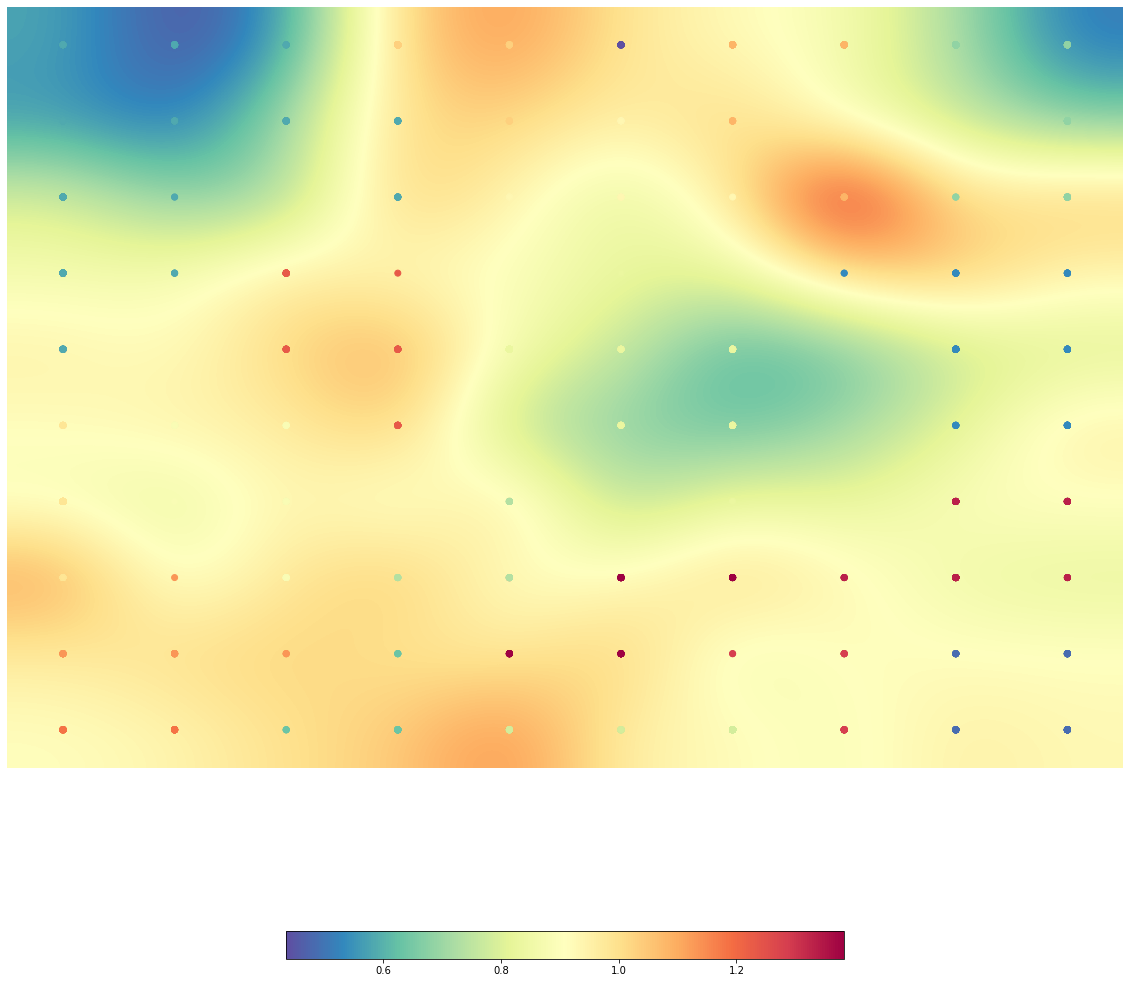

Clusters: [[ 3  3  3 12 12  0 13 13  5  5]
 [ 3  3  3  3 12 10 13 13  5  5]
 [ 3  3  3  3 10 10 10 13  5  5]
 [ 3  3 16 16  8  8  8  2  2  2]
 [ 3  3 16 16  8  8  8  8  2  2]
 [11  9  9 16  8  8  8  8  2  2]
 [11  9  9  8  6 19  8 18 18 18]
 [11 14  9  6  6 19 19 18 18 18]
 [14 14 14  4 19 19 17 17  1  1]
 [15 15  4  4  7  7  7 17  1  1]]
Clusters sorted by increasing number of neurons:
Cluster Index
Number of neurons
[ 0 15 17  4  6  7 11 12  1 14 10 16 13  9 19  5 18  2  8  3]
[ 1  2  3  3  3  3  3  3  4  4  4  5  5  5  5  6  6  7 13 15]


In [51]:
som.view_umatrix(bestmatches=True, colorbar=True, figsize=(20,20))

print("Clusters:", som.clusters)

labels, counts = np.unique(som.clusters, return_counts=True)
sorted_indices = np.argsort(counts) #increasing sort

print("Clusters sorted by increasing number of neurons:",)
print("Cluster Index\nNumber of neurons")
print(labels[sorted_indices])
print(counts[sorted_indices])

Aλλαγή παραμέτρων

In [76]:
n_rows, n_columns = 30, 30
n_epochs = 100
data = final_set[:5000,:]

som_better=somoclu.Somoclu(n_columns, n_rows, compactsupport = False)

%time som_better.train(data, epochs = n_epochs)

bmus_better = som_better.bmus
unique_bmus_better, indices_better = np.unique(bmus_better, return_inverse = True,axis=0)

n_clusters=30
algo = KMeans(n_clusters)
som_better.cluster(algorithm=algo)

CPU times: user 6min 22s, sys: 762 ms, total: 6min 23s
Wall time: 1min 38s


In [77]:
joblib.dump(som_better,'som_better.pkl')
som_better = joblib.load('som_better.pkl')

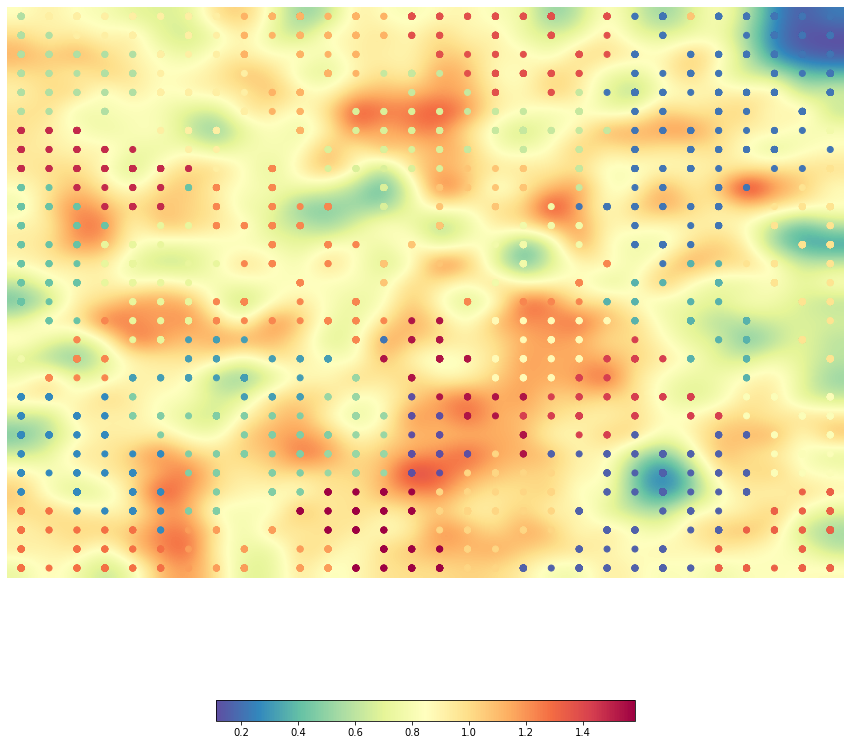

Clusters: [[ 9 16 16 16 16 16 16 16 20 20 20 20 20 20 25 25 25 25 25 25 25 25  2  2
  19  2  2  2  2  2]
 [ 9  9 16 16 16 16 16 16 20 20 20 20 20 20 25 25 25 25 25 25 25 25  2  2
  19  2  2  2  2  2]
 [ 9  9  9  9  9 16 16 16 20 20 20 20 20 20 10 25 25 25 25 25 25 25  2  2
   2  2  2  2  2  2]
 [ 9  9  9  9  9 16 16 16 16 20 20 20 20 10 10 10 25 25 25 25 25  2  2  2
   2  2  2  2  2  2]
 [ 9  9  9  9  9 16 16 16 16 20 20 20 20 10 10 10 10 25 25 25 10  2  2  2
   2  2  2  2  2  2]
 [ 9  9 27  9  9 16 16 16 16 20 20 20 11 11 11 11 10 10 10 10 10 10  2  2
   2  2  2  2  2  2]
 [27 27 27 27 27 16 16 16 16 20 20 22 11 11 11 11 10 10 10 10 10 10  2  2
   2  2  2  2  2 13]
 [27 27 27 27 27 27 16 16 22 22 22 11 11 11 11 11 10 10 10 10 10 10  2  2
   2  2  2  2  2  2]
 [27 27 27 27 27 27 27 16 22 22 22 11 11 11 11 11 19 19 19 10 10  2  2  2
   2  2  2  2  2 17]
 [ 6  6 27 27 27 27  6 22 22 22 22 22 11 11 11 19 19 19 19 10 10  2  2  2
   2  2  2  2 17 17]
 [ 6  6  6 27 27 27 22 22 22 22 22 22 22

In [78]:
som_better.view_umatrix(bestmatches=True, colorbar=True, figsize=(15, 15))

print("Clusters:", som_better.clusters)

labels, counts = np.unique(som_better.clusters, return_counts=True)
sorted_indices = np.argsort(counts) #increasing sort

print("Clusters sorted by increasing number of neurons:",)
print("Cluster Index\nNumber of neurons")
print(labels[sorted_indices])
print(counts[sorted_indices])


## Σημασιολογική ερμηνεία των clusters

Προκειμένου να μελετήσουμε τις τοπολογικές ιδιότητες του SOM και το αν έχουν ενσωματώσει σημασιολογική πληροφορία για τις ταινίες διαμέσου της διανυσματικής αναπαράστασης του tf-idf, των εμφυτευμάτων και των κατηγοριών, χρειαζόμαστε ένα κριτήριο ποιοτικής επισκόπησης των clusters. 

Θα υλοποιήσουμε το εξής κριτήριο: Λαμβάνουμε όρισμα έναν αριθμό (ετικέτα) cluster. Για το cluster αυτό βρίσκουμε όλους τους νευρώνες που του έχουν ανατεθεί από τον k-Means. Για όλους τους νευρώνες αυτούς βρίσκουμε όλες τις ταινίες που τους έχουν ανατεθεί (για τις οποίες αποτελούν bmus). Για όλες αυτές τις ταινίες τυπώνουμε ταξινομημένη τη συνολική στατιστική όλων των ειδών (κατηγοριών) και τις συχνότητές τους. Αν το cluster διαθέτει καλή συνοχή και εξειδίκευση, θα πρέπει κάποιες κατηγορίες να έχουν σαφώς μεγαλύτερη συχνότητα από τις υπόλοιπες. Θα μπορούμε τότε να αναθέσουμε αυτήν/ές την/τις κατηγορία/ες ως ετικέτες κινηματογραφικού είδους στο cluster.

Μπορείτε να υλοποιήσετε τη συνάρτηση αυτή όπως θέλετε. Μια πιθανή διαδικασία θα μπορούσε να είναι η ακόλουθη:

1. Ορίζουμε συνάρτηση `print_categories_stats` που δέχεται ως είσοδο λίστα με ids ταινιών. Δημιουργούμε μια κενή λίστα συνολικών κατηγοριών. Στη συνέχεια, για κάθε ταινία επεξεργαζόμαστε το string `categories` ως εξής: δημιουργούμε μια λίστα διαχωρίζοντας το string κατάλληλα με την `split` και αφαιρούμε τα whitespaces μεταξύ ετικετών με την `strip`. Προσθέτουμε τη λίστα αυτή στη συνολική λίστα κατηγοριών με την `extend`. Τέλος χρησιμοποιούμε πάλι την `np.unique` για να μετρήσουμε συχνότητα μοναδικών ετικετών κατηγοριών και ταξινομούμε με την `np.argsort`. Τυπώνουμε τις κατηγορίες και τις συχνότητες εμφάνισης ταξινομημένα. Χρήσιμες μπορεί να σας φανούν και οι `np.ravel`, `np.nditer`, `np.array2string` και `zip`.

2. Ορίζουμε τη βασική μας συνάρτηση `print_cluster_neurons_movies_report` που δέχεται ως όρισμα τον αριθμό ενός cluster. Με τη χρήση της `np.where` μπορούμε να βρούμε τις συντεταγμένες των bmus που αντιστοιχούν στο cluster και με την `column_stack` να φτιάξουμε έναν πίνακα bmus για το cluster. Προσοχή στη σειρά (στήλη - σειρά) στον πίνακα bmus. Για κάθε bmu αυτού του πίνακα ελέγχουμε αν υπάρχει στον πίνακα μοναδικών bmus που έχουμε υπολογίσει στην αρχή συνολικά και αν ναι προσθέτουμε το αντίστοιχο index του νευρώνα σε μια λίστα. Χρήσιμες μπορεί να είναι και οι `np.rollaxis`, `np.append`, `np.asscalar`. Επίσης πιθανώς να πρέπει να υλοποιήσετε ένα κριτήριο ομοιότητας μεταξύ ενός bmu και ενός μοναδικού bmu από τον αρχικό πίνακα bmus.

3. Υλοποιούμε μια βοηθητική συνάρτηση `neuron_movies_report`. Λαμβάνει ένα σύνολο νευρώνων από την `print_cluster_neurons_movies_report` και μέσω της `indices` φτιάχνει μια λίστα με το σύνολο ταινιών που ανήκουν σε αυτούς τους νευρώνες. Στο τέλος καλεί με αυτή τη λίστα την `print_categories_stats` που τυπώνει τις στατιστικές των κατηγοριών.

Μπορείτε βέβαια να προσθέσετε οποιαδήποτε επιπλέον έξοδο σας βοηθάει. Μια χρήσιμη έξοδος είναι πόσοι νευρώνες ανήκουν στο cluster και σε πόσους και ποιους από αυτούς έχουν ανατεθεί ταινίες.

Θα επιτελούμε τη σημασιολογική ερμηνεία του χάρτη καλώντας την `print_cluster_neurons_movies_report` με τον αριθμός ενός cluster που μας ενδιαφέρει. 

Παράδειγμα εξόδου για ένα cluster (μη βελτιστοποιημένος χάρτης, ωστόσο βλέπετε ότι οι μεγάλες κατηγορίες έχουν σημασιολογική  συνάφεια):

```
Overall Cluster Genres stats:  
[('"Horror"', 86), ('"Science Fiction"', 24), ('"B-movie"', 16), ('"Monster movie"', 10), ('"Creature Film"', 10), ('"Indie"', 9), ('"Zombie Film"', 9), ('"Slasher"', 8), ('"World cinema"', 8), ('"Sci-Fi Horror"', 7), ('"Natural horror films"', 6), ('"Supernatural"', 6), ('"Thriller"', 6), ('"Cult"', 5), ('"Black-and-white"', 5), ('"Japanese Movies"', 4), ('"Short Film"', 3), ('"Drama"', 3), ('"Psychological thriller"', 3), ('"Crime Fiction"', 3), ('"Monster"', 3), ('"Comedy"', 2), ('"Western"', 2), ('"Horror Comedy"', 2), ('"Archaeology"', 2), ('"Alien Film"', 2), ('"Teen"', 2), ('"Mystery"', 2), ('"Adventure"', 2), ('"Comedy film"', 2), ('"Combat Films"', 1), ('"Chinese Movies"', 1), ('"Action/Adventure"', 1), ('"Gothic Film"', 1), ('"Costume drama"', 1), ('"Disaster"', 1), ('"Docudrama"', 1), ('"Film adaptation"', 1), ('"Film noir"', 1), ('"Parody"', 1), ('"Period piece"', 1), ('"Action"', 1)]```
   

In [79]:
def print_categories_stats(ids):
    categories_list=[]
    
    for movie in ids:
        cats = categories[movie][0]
        movie_categories = cats.split(",")
        movie_categories = [cat.strip() for cat in movie_categories]
        
        categories_list.extend(movie_categories)
    
    labels, counts = np.unique(categories_list, return_counts = True)
    sorted_indices = np.argsort(counts)[::-1] #sort in decreasing order

    stats = dict(zip(labels[sorted_indices], counts[sorted_indices]))
    
    print('Overall Cluster Genres stats:')
   # print(stats)
    return stats

In [80]:
def print_cluster_neurons_movies_report(cluster, som_model, ubmus):
    coordinates=np.where(som_model.clusters==cluster)[::-1] #στήλη-σειρά
    bmus_array=np.column_stack(coordinates)
    #print(bmus_array)
  
    idx =[]
    for bmu in bmus_array:
        if bmu in ubmus:
            idx.append(bmu)
            
    idx = np.asarray(idx)
   # print(idx)
    return idx

In [81]:
def neuron_movies_report(neurons):
    movies=[]
    for neuron in neurons:
        movies.extend(np.where(unique_bmus_better == neuron)[0])
        
    return print_categories_stats(movies)

In [82]:
neuron_movies_report(print_cluster_neurons_movies_report(20, som_better, unique_bmus_better))

Overall Cluster Genres stats:


{'"Drama"': 563,
 '"Comedy"': 386,
 '"Romance Film"': 210,
 '"Action"': 194,
 '"World cinema"': 175,
 '"Family Film"': 168,
 '"Black-and-white"': 167,
 '"Thriller"': 165,
 '"Horror"': 163,
 '"Indie"': 133,
 '"Adventure"': 130,
 '"Short Film"': 123,
 '"Crime Fiction"': 108,
 '"Fantasy"': 98,
 '"Action/Adventure"': 94,
 '"Science Fiction"': 89,
 '"Parody"': 86,
 '"Animation"': 83,
 '"Romantic comedy"': 80,
 '"Romantic drama"': 69,
 '"Silent film"': 56,
 '"Japanese Movies"': 54,
 '"Musical"': 54,
 '"Documentary"': 53,
 '"Comedy film"': 50,
 '"Western"': 44,
 '"War film"': 42,
 '"Television movie"': 41,
 '"Teen"': 40,
 '"Cult"': 37,
 '"Comedy-drama"': 36,
 '"Mystery"': 34,
 '"Film adaptation"': 34,
 '"Chinese Movies"': 34,
 '"Bollywood"': 33,
 '"Crime Thriller"': 32,
 '"Pre-Code"': 32,
 '"Sports"': 30,
 '"Children\'s/Family"': 28,
 '"Satire"': 26,
 '"Alien Film"': 26,
 '"Family Drama"': 25,
 '"Slasher"': 25,
 '"Art film"': 24,
 '"Screwball comedy"': 22,
 '"Black comedy"': 21,
 '"Period pie

 ## Tips για το SOM και το clustering

- Για την ομαδοποίηση ένα U-matrix καλό είναι να εμφανίζει και μπλε-πράσινες περιοχές (clusters) και κόκκινες περιοχές (ορίων). Παρατηρήστε ποια σχέση υπάρχει μεταξύ αριθμού ταινιών στο final set, μεγέθους grid και ποιότητας U-matrix.
- Για το k του k-Means προσπαθήστε να προσεγγίζει σχετικά τα clusters του U-matrix (όπως είπαμε είναι διαφορετικοί μέθοδοι clustering). Μικρός αριθμός k δεν θα σέβεται τα όρια. Μεγάλος αριθμός θα δημιουργεί υπο-clusters εντός των clusters που φαίνονται στο U-matrix. Το τελευταίο δεν είναι απαραίτητα κακό, αλλά μεγαλώνει τον αριθμό clusters που πρέπει να αναλυθούν σημασιολογικά.
- Σε μικρούς χάρτες και με μικρά final sets δοκιμάστε διαφορετικές παραμέτρους για την εκπαίδευση του SOM. Σημειώστε τυχόν παραμέτρους που επηρεάζουν την ποιότητα του clustering για το dataset σας ώστε να τις εφαρμόσετε στους μεγάλους χάρτες.
- Κάποια τοπολογικά χαρακτηριστικά εμφανίζονται ήδη σε μικρούς χάρτες. Κάποια άλλα χρειάζονται μεγαλύτερους χάρτες. Δοκιμάστε μεγέθη 20x20, 25x25 ή και 30x30 και αντίστοιχη προσαρμογή των k. Όσο μεγαλώνουν οι χάρτες, μεγαλώνει η ανάλυση του χάρτη αλλά μεγαλώνει και ο αριθμός clusters που πρέπει να αναλυθούν.




## Ανάλυση τοπολογικών ιδιοτήτων χάρτη SOM

Μετά το πέρας της εκπαίδευσης και του clustering θα έχετε ένα χάρτη με τοπολογικές ιδιότητες ως προς τα είδη των ταίνιών της συλλογής σας, κάτι αντίστοιχο με την εικόνα στην αρχή της Εφαρμογής 2 αυτού του notebook. Η συγκεκριμένη εικόνα είναι μόνο για εικονογράφιση, δεν είναι χάρτης SOM καιδεν έχει καμία σχέση με τη συλλογή δεδομένων και τις κατηγορίες μας.

Για τον τελικό χάρτη SOM που θα παράξετε για τη συλλογή σας, αναλύστε σε markdown με συγκεκριμένη αναφορά σε αριθμούς clusters και τη σημασιολογική ερμηνεία τους τις εξής τρεις τοπολογικές ιδιότητες του SOM: 

1. Δεδομένα που έχουν μεγαλύτερη πυκνότητα πιθανότητας στο χώρο εισόδου τείνουν να απεικονίζονται με περισσότερους νευρώνες στο χώρο μειωμένης διαστατικότητας. Δώστε παραδείγματα από συχνές και λιγότερο συχνές κατηγορίες ταινιών. Χρησιμοποιήστε τις στατιστικές των κατηγοριών στη συλλογή σας και τον αριθμό κόμβων που χαρακτηρίζουν.
2. Μακρινά πρότυπα εισόδου τείνουν να απεικονίζονται απομακρυσμένα στο χάρτη. Υπάρχουν χαρακτηριστικές κατηγορίες ταινιών που ήδη από μικρούς χάρτες τείνουν να τοποθετούνται σε διαφορετικά ή απομονωμένα σημεία του χάρτη.
3. Κοντινά πρότυπα εισόδου τείνουν να απεικονίζονται κοντά στο χάρτη. Σε μεγάλους χάρτες εντοπίστε είδη ταινιών και κοντινά τους υποείδη.

Προφανώς τοποθέτηση σε 2 διαστάσεις που να σέβεται μια απόλυτη τοπολογία δεν είναι εφικτή, αφενός γιατί δεν υπάρχει κάποια απόλυτη εξ ορισμού για τα κινηματογραφικά είδη ακόμα και σε πολλές διαστάσεις, αφετέρου γιατί πραγματοποιούμε μείωση διαστατικότητας.

Εντοπίστε μεγάλα clusters και μικρά clusters που δεν έχουν σαφή χαρακτηριστικά. Εντοπίστε clusters συγκεκριμένων ειδών που μοιάζουν να μην έχουν τοπολογική συνάφεια με γύρω περιοχές. Προτείνετε πιθανές ερμηνείες.


Τέλος, εντοπίστε clusters που έχουν κατά την άποψή σας ιδιαίτερο ενδιαφέρον στη συλλογή της ομάδας σας (data exploration / discovery value) και σχολιάστε.


### Δεδομένα που έχουν μεγαλύτερη πυκνότητα πιθανότητας στο χώρο εισόδου τείνουν να απεικονίζονται με περισσότερους νευρώνες στο χώρο μειωμένης διαστατικότητας. Δώστε παραδείγματα από συχνές και λιγότερο συχνές κατηγορίες ταινιών. Χρησιμοποιήστε τις στατιστικές των κατηγοριών στη συλλογή σας και τον αριθμό κόμβων που χαρακτηρίζουν.

In [83]:
categ_freq = print_categories_stats(range(len(data)))
                                    
print("most frequent categories:",list(categ_freq.items())[:5])
print("least frequent categories:",list(categ_freq.items())[-5:])

Overall Cluster Genres stats:
most frequent categories: [('"Drama"', 2247), ('"Comedy"', 1246), ('"Thriller"', 807), ('"Romance Film"', 769), ('"Action"', 699)]
least frequent categories: [('"Mondo film"', 1), ('"Dogme 95"', 1), ('"Malayalam Cinema"', 1), ('"Libraries and librarians"', 1), ('"Law & Crime"', 1)]


In [84]:
from itertools import islice

def nodes_in_cluster(k):
    total_nodes=[]
    for i in range(k):
        freqs =  neuron_movies_report(print_cluster_neurons_movies_report(i, som_better, unique_bmus_better))
        total_nodes.append(sum(freqs.values()))
        print("total_nodes of:", i,"are", sum(freqs.values()))

In [85]:
nodes_in_cluster(30)

Overall Cluster Genres stats:
total_nodes of: 0 are 1751
Overall Cluster Genres stats:
total_nodes of: 1 are 9029
Overall Cluster Genres stats:
total_nodes of: 2 are 15395
Overall Cluster Genres stats:
total_nodes of: 3 are 5886
Overall Cluster Genres stats:
total_nodes of: 4 are 3814
Overall Cluster Genres stats:
total_nodes of: 5 are 4605
Overall Cluster Genres stats:
total_nodes of: 6 are 3899
Overall Cluster Genres stats:
total_nodes of: 7 are 5571
Overall Cluster Genres stats:
total_nodes of: 8 are 2394
Overall Cluster Genres stats:
total_nodes of: 9 are 3696
Overall Cluster Genres stats:
total_nodes of: 10 are 4966
Overall Cluster Genres stats:
total_nodes of: 11 are 3991
Overall Cluster Genres stats:
total_nodes of: 12 are 3872
Overall Cluster Genres stats:
total_nodes of: 13 are 2515
Overall Cluster Genres stats:
total_nodes of: 14 are 3066
Overall Cluster Genres stats:
total_nodes of: 15 are 2357
Overall Cluster Genres stats:
total_nodes of: 16 are 6084
Overall Cluster Genres 

### Κοντινά πρότυπα εισόδου τείνουν να απεικονίζονται κοντά στο χάρτη. Σε μεγάλους χάρτες εντοπίστε είδη ταινιών και κοντινά τους υποείδη.

### Εντοπίστε μεγάλα clusters και μικρά clusters που δεν έχουν σαφή χαρακτηριστικά. Εντοπίστε clusters συγκεκριμένων ειδών που μοιάζουν να μην έχουν τοπολογική συνάφεια με γύρω περιοχές. Προτείνετε πιθανές ερμηνείες.

### Eντοπίστε clusters που έχουν κατά την άποψή σας ιδιαίτερο ενδιαφέρον στη συλλογή της ομάδας σας (data exploration / discovery value) και σχολιάστε.


# Τελική παράδοση άσκησης

- Θα παραδώσετε στο helios το παρόν notebook επεξεργασμένο ή ένα ή δύο νέα zipαρισμένα με τις απαντήσεις σας για τα ζητούμενα και των δύο εφαρμογών. 
- Θυμηθείτε ότι η ανάλυση του χάρτη στο markdown με αναφορά σε αριθμούς clusters πρέπει να αναφέρεται στον τελικό χάρτη με τα κελιά ορατά που θα παραδώσετε αλλιώς ο χάρτης που θα προκύψει θα είναι διαφορετικός και τα labels των clusters δεν θα αντιστοιχούν στην ανάλυσή σας. 
- Μην ξεχάσετε στην αρχή ένα κελί markdown με **τα στοιχεία της ομάδας σας**.

<table>
  <tr><td align="center">
    <font size="4">Παρακαλούμε διατρέξτε βήμα-βήμα το notebook για να μην ξεχάσετε παραδοτέα</font>
</td>
  </tr>
</table>